# Smart Attrition Prediction & Employee Wellness Recommendation Engine

In [1]:

# MODULE 1: Data Collection & Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Dummy employee dataset
data = {
    'EmployeeID': range(1, 21),
    'Age': np.random.randint(25, 50, size=20),
    'Gender': np.random.choice(['Male', 'Female'], size=20),
    'Department': np.random.choice(['HR', 'IT', 'Sales', 'Finance'], size=20),
    'Tenure': np.random.randint(1, 10, size=20),
    'JobSatisfaction': np.random.randint(1, 5, size=20),
    'MonthlyIncome': np.random.randint(30000, 90000, size=20),
    'Attrition': np.random.choice(['Yes', 'No'], size=20),
    'SurveyComment': np.random.choice([
        "I feel stressed often", "Good place to work", 
        "No recognition", "Need better leadership", 
        "Work-life balance is okay"
    ], size=20)
}

df = pd.DataFrame(data)

# Label Encoding
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Department'] = label_encoder.fit_transform(df['Department'])

df.to_csv("employee_cleaned.csv", index=False)
df.head()


,EmployeeID,Age,Gender,Department,Tenure,JobSatisfaction,MonthlyIncome,Attrition,SurveyComment
0,1,40,1,1,1,1,58163,0,I feel stressed often
1,2,39,1,3,7,4,74306,0,Need better leadership
2,3,34,0,1,7,1,54587,0,Need better leadership
3,4,45,1,3,3,3,53903,0,No recognition
4,5,45,1,2,5,1,49520,1,Need better leadership


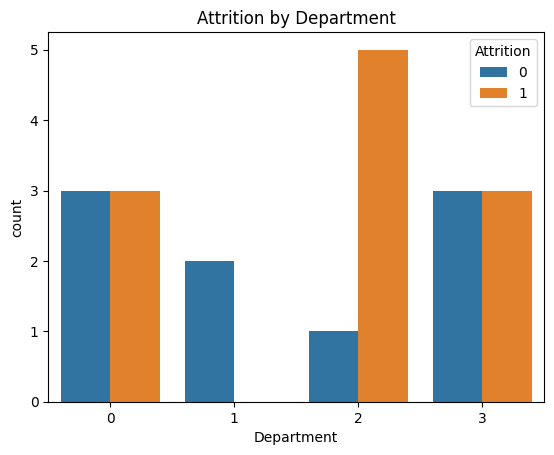

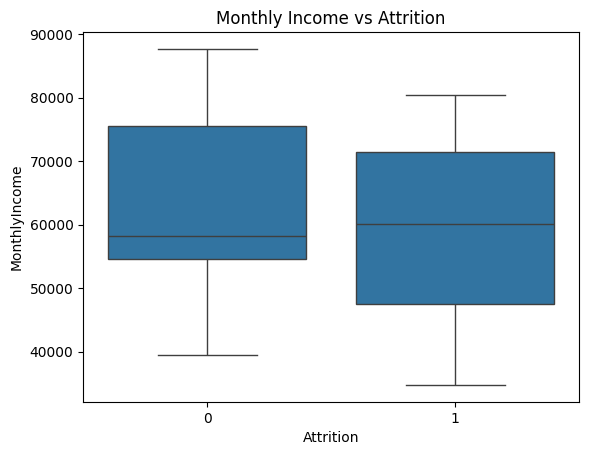

In [2]:

# MODULE 2: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.savefig("eda_attrition_by_department.png")
plt.show()

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.savefig("eda_income_vs_attrition.png")
plt.show()


In [3]:

# MODULE 3: Attrition Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = ['Age', 'Gender', 'Department', 'Tenure', 'JobSatisfaction', 'MonthlyIncome']
X = df[features]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



In [5]:

# MODULE 4: Sentiment & Wellness Analysis
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['SentimentScore'] = df['SurveyComment'].apply(get_sentiment)

def classify_wellness(row):
    if row['Attrition'] == 1 and row['SentimentScore'] < 0:
        return 'At Risk'
    elif row['SentimentScore'] >= 0.2:
        return 'Thriving'
    else:
        return 'Stable'

df['WellnessStatus'] = df.apply(classify_wellness, axis=1)
df[['EmployeeID', 'SentimentScore', 'WellnessStatus']]


,EmployeeID,SentimentScore,WellnessStatus
0,1,0.0,Stable
1,2,0.5,Thriving
2,3,0.5,Thriving
3,4,0.0,Stable
4,5,0.5,Thriving
5,6,0.5,Thriving
6,7,0.0,Stable
7,8,0.0,Stable
8,9,0.5,Thriving
9,10,0.5,Thriving


In [8]:

# MODULE 5: Recommendation System
def get_recommendation(row):
    if row['WellnessStatus'] == "At Risk":
        return "Immediate manager check-in, Flex schedule"
    elif row['WellnessStatus'] == "Stable":
        return "Mentorship or Training"
    else:
        return "Public Recognition or Bonus"

df['Recommendation'] = df.apply(get_recommendation, axis=1)
df[['EmployeeID', 'WellnessStatus', 'Recommendation']]
df.to_csv("final_output.csv", index=False)
result=pd.read_csv('final_output.csv')
result.head(20)

,EmployeeID,Age,Gender,Department,Tenure,JobSatisfaction,MonthlyIncome,Attrition,SurveyComment,SentimentScore,WellnessStatus,Recommendation
0,1,40,1,1,1,1,58163,0,I feel stressed often,0.0,Stable,Mentorship or Training
1,2,39,1,3,7,4,74306,0,Need better leadership,0.5,Thriving,Public Recognition or Bonus
2,3,34,0,1,7,1,54587,0,Need better leadership,0.5,Thriving,Public Recognition or Bonus
3,4,45,1,3,3,3,53903,0,No recognition,0.0,Stable,Mentorship or Training
4,5,45,1,2,5,1,49520,1,Need better leadership,0.5,Thriving,Public Recognition or Bonus
5,6,39,1,2,2,2,64514,1,Need better leadership,0.5,Thriving,Public Recognition or Bonus
6,7,34,0,0,6,2,70850,1,I feel stressed often,0.0,Stable,Mentorship or Training
7,8,43,1,0,2,3,87689,0,No recognition,0.0,Stable,Mentorship or Training
8,9,25,1,3,9,3,71971,1,Need better leadership,0.5,Thriving,Public Recognition or Bonus
9,10,25,1,2,4,1,35793,1,Work-life balance is okay,0.5,Thriving,Public Recognition or Bonus
